# Introduction to Cascaded Nonlinearity

Cascaded nonlinearity is a process in which a highly inefficient $\chi^{(2)}$ process leads to an effective $\chi^{(3)}$ process. In this notebook, we will explore this phenomenon through simulations of second harmonic generation and the Kerr effect. First, we will revisit the key properties of these two concepts, and then we will examine why cascaded nonlinearity allows us to transform one into the other.

In [1]:
# Import SHG and Kerr sovlers
from CascadeNL import *

(We perform sanity check of the numerical solvers in `SanityCheck.ipynb`)

In [2]:
# Uncomment it if you prefer vector plots
# %config InlineBackend.figure_formats = ['svg']    

### Revisit Second Harmonic Generation

Let us first write out the coupled-wave equation for second harmonic generation (SHG). The continuous wave equations of SHG is provided in Boyd's textbook in equation (2.7.10) and (2.7.11). Here we are interested in a pulse simulation, so we also need to take dispersion and temporal walk-off into consideration, as Logan mentioned in class:
\begin{equation}
\begin{aligned}
{\left[i \frac{\partial}{\partial z}-\frac{1}{2} k_1^{(2)} \frac{\partial^2}{\partial \tau^2}\right] E_1+\frac{\omega_1 d_{\mathrm{eff}}}{c n_1} E_1^* E_2 e^{i \Delta k z} } & =0 \qquad (1) \\
{\left[i \frac{\partial}{\partial z}-i d_{12} \frac{\partial}{\partial \tau}-\frac{1}{2} k_2^{(2)} \frac{\partial^2}{\partial \tau^2}\right] E_2+\frac{\omega_1 d_{\mathrm{eff}}}{c n_2} E_1^2 e^{-i \Delta k z} } & =0  \qquad (2)
\end{aligned}
\end{equation}
Here are the variables we use:
* wave numbers $k_j(\omega)=n_j(\omega) \omega / c$
* refractive indices $n_j(\omega)$
* dispersion coefficients $k_j^{(m)}=\left.{d^m k_j}/{d \omega^m}\right|_{\omega=\omega_j}$ (we only keep up to 2nd order)
* phase mismatch parameter $\Delta k=k_2^{(0)}-2 k_1^{(0)}$
* group-velocity mismatch parameter $d_{12}=k_1^{(1)}-k_2^{(1)}$

#### Normalized coordinate

To simplify our simulation, as a starting point I will make a few approximations and simplifications:
* We assume long pulses so we neglect the temperol walk-off, i.e. let $d_{12}=0$
* I will work with the normalized unit. Specifically, the nonlinear interaction will be expressed in unit of the nonlinear length. If this point is unfarmiliar to you, I would recommend Boyd's textbook Sec 2.7 (on nonlinear length in SHG) and Aragwal's textbook Sec 3.1 (on dispersion length and nonlinear length in Kerr nonlinearity)

With these simplifications, we can rewrite out SHG equation as

\begin{equation}
\begin{aligned}
{\left[i \frac{\partial}{\partial z}-\frac{1}{2} \beta_2^{(1)}\frac{\partial^2}{\partial \tau^2}\right] u_1+\frac{1}{L_{\mathrm{NL}}} u_1^* u_2 e^{i \Delta \beta_0 z} } & =0 \qquad (3) \\
{\left[i \frac{\partial}{\partial z}-\frac{1}{2} \beta_2^{(2)} \frac{\partial^2}{\partial \tau^2}\right] u_2+\frac{1}{2L_{\mathrm{NL}'}} u_1^2 e^{-i \Delta \beta_0 z} } & =0  \qquad (4)
\end{aligned}
\end{equation}

Here specifying the definition of each quantity is too cumbersome so I will just skip it. In short, every variable is proportional to its counterpart in equations (1) and (2), but since we are working with normalized quantities, they are now all unitless. This will make our life a LOT easier.

#### Examples

In our first SHG example, we set the dispersion to be zero `beta21 = 0, beta22 = 0` and we can observe very high SHG efficiency (>60%). The transition from the pump field to the signal field is also apparent.

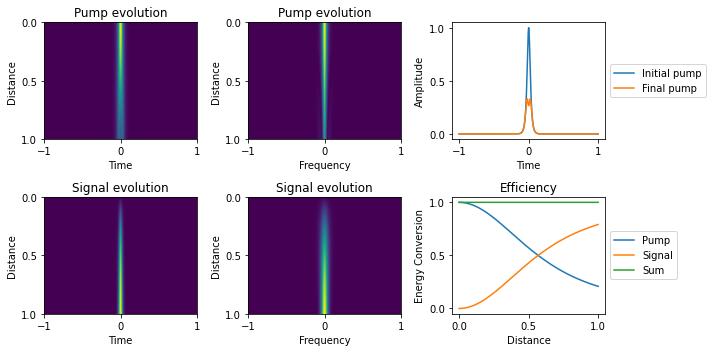

In [3]:
SHG(beta21 = 0, beta22 = 0, dbeta0 = 0, 
    length = 2, nlLength1 = 1, nlLength2 = 1, 
    tMax = 50, tPrecision = 2**10, zPrecision = 2000)

If we set the dispersion to be nonzero `beta21 = 2, beta22 = 2`, we can observe a temporal broadening of the pump. And as a result the SHG efficiency is smaller than without dispersion.

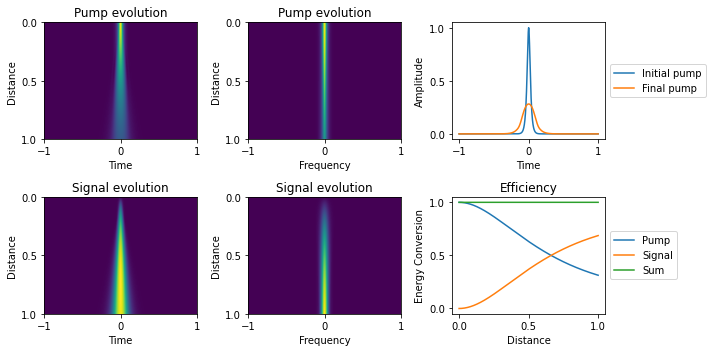

In [4]:
SHG(beta21 = 2, beta22 = 2, dbeta0 = 0, 
    length = 2, nlLength1 = 1, nlLength2 = 1, 
    tMax = 50, tPrecision = 2**10, zPrecision = 2000)

### Revisit Kerr nonlinearity

We can write the wave equation with Kerr nonlinearity as
$$
\left[i \frac{\partial}{\partial z}-\frac{1}{2} \beta_2 \frac{\partial^2}{\partial \tau^2}\right] u+\chi^{(3)}\left|u\right|^2 u=0
$$
And we can solve this equation efficiently by the split-step Fourier method, as we did in assignment 1. Now we briefly revisit some nonlinear phenomena.

#### Examples

First, we can set the dispersion to be zero `beta2 = 0` to observe self-phase modulation. In the time domain, the amplitude of the pulse won't change, but in the frequency domain, more frequency components are genearated due to self-phase modulation. This is also referred to as spectral broadening or supercontinuum generation. Here we are always assuming a $\mathrm{sech}^2$ pump pulse.

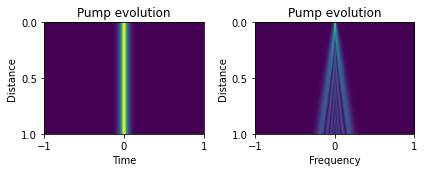

In [5]:
Kerr(beta2 = 0, gamma = 2.5, length = 10, tMax = 36, tPrecision = 2**11, zPrecision = 2000)

Then, if we set the nonlinearity to be zero `gamma = 0`, we can observe the broadening of the pulse in the time domain due to dispersion:

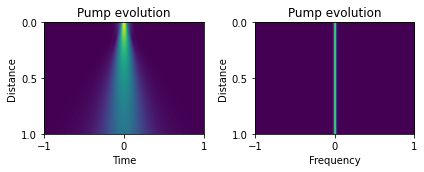

In [6]:
Kerr(beta2 = -1, gamma = 0, length = 10, tMax = 36, tPrecision = 2**11, zPrecision = 2000)

If we let nonlinearity to be larger than dispersion `beta2 = -1, gamma = 3`, we can observe the self-focusing phenomenon due to Kerr nonlineaerity:

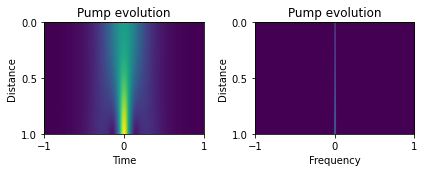

In [7]:
Kerr(beta2 = -1, gamma = 3, length = 1, tMax = 6, tPrecision = 2**11, zPrecision = 2000)

If the nonlineary balances the dispersion, we can observe solitons: the pulse is always stable in the time and frequency domain. For example, here we show an example where the pulse is stable over 10 dispersion lengths. Note that here our solver assumes a $\mathrm{sech}^2$ pulse and the fundamental soliton condition is `beta2=-gamma`

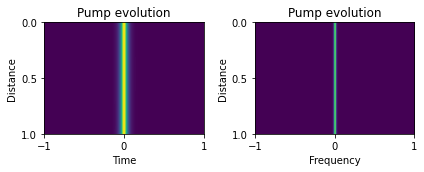

In [8]:
Kerr(beta2 = -1, gamma = 1, length = 10, tMax = 36, tPrecision = 2**11, zPrecision = 2000)

### Cascaded Nonlinearity

To observe a cascaded Kerr nonlinearity from SHG, we need to make the following assumptions:
* Our SHG is heavily phase-mismatched $|\Delta k| L \gg 2 \pi$
* Our pulses are very long so we neglect the dispersion terms in the second equation

Under these assumptions we can solve for the simplified SH equation (4),

$$
i \frac{\partial}{\partial z} u_2+\frac{1}{2L_{\mathrm{NL}}'} u_1^2 e^{-i \Delta \beta_0 z}  =0 \quad\Rightarrow\quad u_2(z)=\tilde u_2 e^{-i \Delta \beta_0 z} ~~ \text{where} ~~ \tilde u_2=-\frac{1}{2L_{\mathrm{NL}}'\Delta \beta_0} u_1^2
$$

Inserting this to Eq. (1) gives us

$$
\left[i \frac{\partial}{\partial z}-\frac{1}{2} \beta_2^{(1)} \frac{\partial^2}{\partial \tau^2}\right] u_1+\chi_{\text {casc }}^{(3)}\left|u_1\right|^2 u_1=0, \quad \text{where} ~~ \chi_{\mathrm{casc}}^{(3)}=-\frac{1}{2L_{\mathrm{NL}}'L_{\mathrm{NL}}\Delta \beta_0} \qquad (5)
$$

Amazingly, we now have a nonlinear equation with **Kerr nonlinearity**!

#### Discussion

There are two properties of the cascade nonlinearity that I find very interesting:

1. Its magnitude can be tuned by the phase mismatch $\Delta k$.

2. Its sign can be changed by changing the sign of $\Delta k$.

It is relatively easy to control $\Delta k$ in experiments:

* For birefringent materials, we can tune $\Delta k$ by changing the angle between the ordinary and extraordinary axis; 

* For other $\chi^{(2)}$ materials, we can adopt periodic poling (quasi phase-matching) and $\Delta k$ can be tuned by changing the poling period.

#### Intuition - gradually increase the phase mismatch

To better understand what exactly is the "cascade" process, we can gradually increase the phase mismatch:

First, recall when we do not have phase mismatch `dbeta0 = 0`, we get a very efficient SHG process

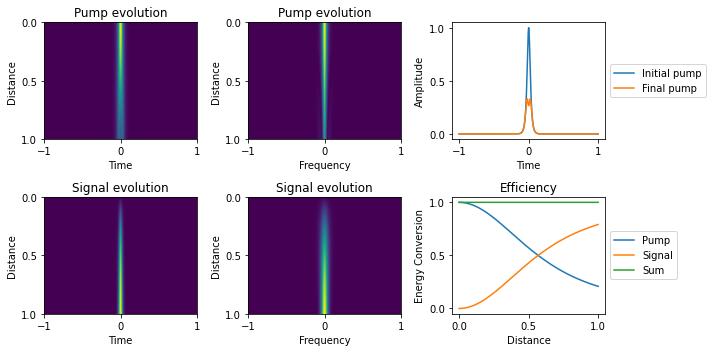

In [9]:
SHG(beta21 = 0, beta22 = 0, dbeta0 = 0, 
    length = 2, nlLength1 = 1, nlLength2 = 1, 
    tMax = 50, tPrecision = 2**10, zPrecision = 2000)

When we have moderate phase mismatch `dbeta0 = 10`, we will observe the oscillation between the pump and signal field:

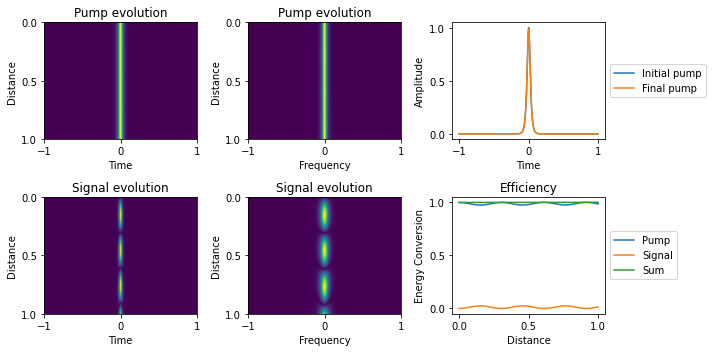

In [10]:
SHG(beta21 = 0, beta22 = 0, dbeta0 = 10, 
    length = 2, nlLength1 = 1, nlLength2 = 1, 
    tMax = 50, tPrecision = 2**10, zPrecision = 2000)

When the mismatch is very large `dbeta0 = 100`, there is almost no visible oscillation between the two modes. In this case, we will get an effective cascaded $\chi^{(3)}$ nonlinearity.

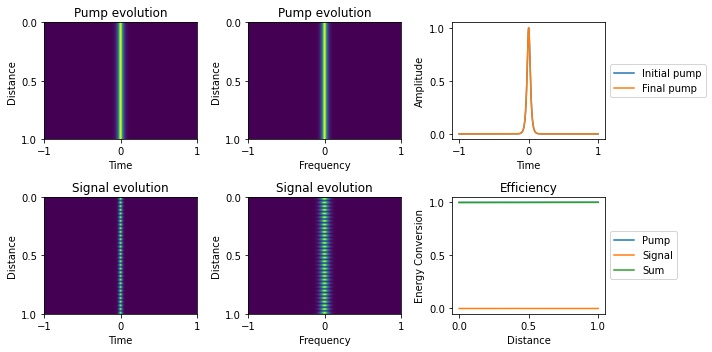

In [11]:
SHG(beta21 = 0, beta22 = 0, dbeta0 = 100, 
    length = 2, nlLength1 = 1, nlLength2 = 1, 
    tMax = 50, tPrecision = 2**10, zPrecision = 2000)

#### Cascade nonlinearity !

Finally, we are ready to see the Kerr effect induced by cascaded nonlinearity. We will start with the following parameters: `dbeta0 = 20, nlLength1 = 0.1, nlLength2 = 0.1`, which, according to Equation (5), will lead to an effective $\chi^{(3)}$ nonlinearity of `1/nlLength1/nlLength1/2/dbeta0`.

In [12]:
print("effective chi-3:", 1/0.1/0.1/2/20)

effective chi-3: 2.5


We can observe spectral broadening by **self-phase modulation** in this **second harmonic generation** process!

To see an accurate simulation, we must have a very fine resolution in $z$ to capture the oscillation between the fundamental wave and the signal wave. The cell below takes about 4 minutes to run on my laptop.

We can observe that it is not exactly the same as a $\chi^{(3)}$ process, though: A small portion of the pump field is converted to the signal field before the energy conversion becomes steady. I am actually not sure if this effect can be suppressed by tuning the parameters. I tried some different parameters, but the trend is the same. Future work could involve fine-tuning the parameters to suppress this effect.

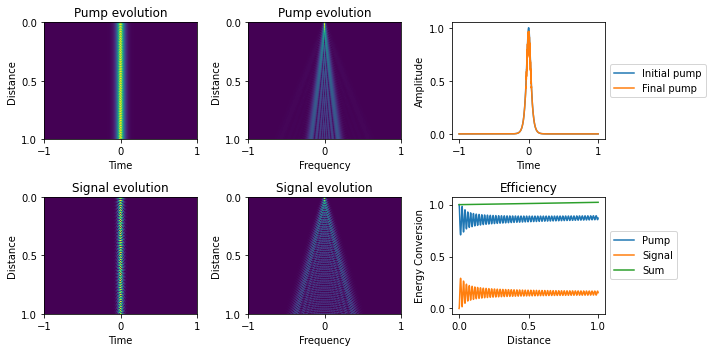

CPU times: user 1min 34s, sys: 1min 49s, total: 3min 24s
Wall time: 4min 40s


In [13]:
%%time
SHG(beta21 = 0, beta22 = 0, dbeta0 = 20, 
        length = 10, nlLength1 = 0.1, nlLength2 = 0.1, 
        tMax = 36, tPrecision = 2**11, zPrecision = 100000) # this will take a longer time

Another natural question is: Is our prediction of the effective $\chi^{(3)}$ coefficient accurate? We can simulate such $\chi^{(3)}$ nonlinearity and compare it with the cascaded nonlinearity. If we compare the two pump evolutions, they are highly similar! This shows that our model in Equation (5) is very accurate.

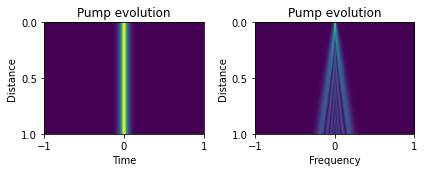

In [14]:
Kerr(beta2 = 0, gamma = 2.5, length = 10, tMax = 36, tPrecision = 2**11, zPrecision = 2000)

#### Solitons by cascaded nonlinearity

Is it possible to observe soliton in the cascaded nonlinearity? Recall that the soliton condition for our solver is `beta21=-gamma`, so I set `beta21 = -2.5` in the simulation.

We can see that, without the cascaded nonlinearity (`nlLength1 = 1e8` is equivalent to no chi-2 nonlinearity), the pulse is dispersive. But after we turn on the nonlinearity, the temporal broadening is suppressed, and the pulse is almost steady after the initial oscillation, similar to the behavior of a fundamental soliton!

Without cascaded nonlinearity:


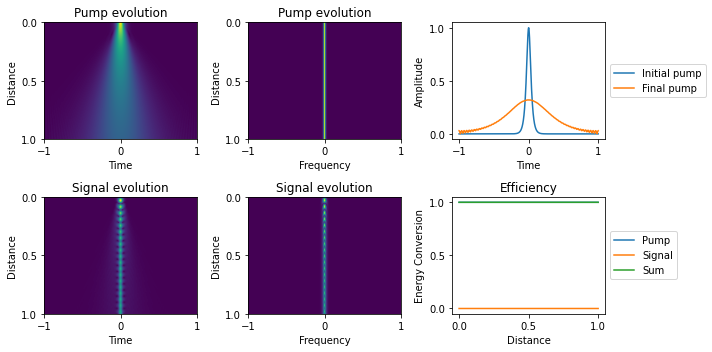

In [15]:
print("Without cascaded nonlinearity:")

SHG(beta21 = -2.5, beta22 = 0, dbeta0 = 20, 
    length = 6, nlLength1 = 1e8, nlLength2 = 1e8, 
    tMax = 36, tPrecision = 2**11, zPrecision = 2000)

With cascaded nonlinearity:


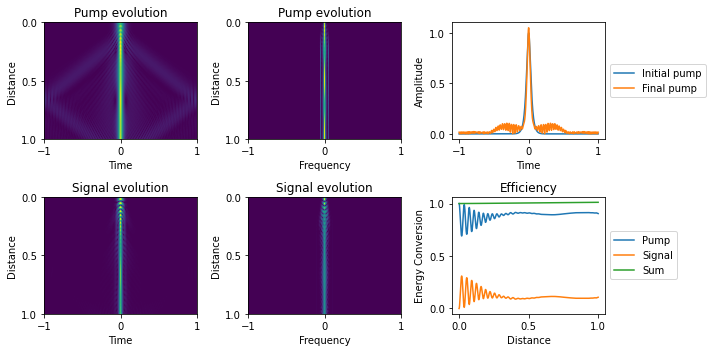

In [16]:
print("With cascaded nonlinearity:")

SHG(beta21 = -2.5, beta22 = 0, dbeta0 = 20, 
    length = 6, nlLength1 = 0.1, nlLength2 = 0.1, 
    tMax = 36, tPrecision = 2**11, zPrecision = 100000) # this will take a longer time

#### Self defocusing

Recall that in Kerr nonlinearity, if the nonlinearity is larger than dispersion, the pulse will focus itself, also called self-focusing. The $\chi^{(3)}$ nonlinear coefficient of natural materials must be positive, as we discussed in class. However, we can tune the sign of the effective nonlinear coefficient by changing the sign of phase mismatch [Equation (5)], which can lead to a negative $\chi^{(3)}$ nonlinear coefficient. Amazingly, this can lead to self-defocusing!

Self-focusing:


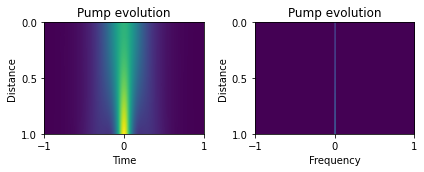

In [17]:
print("Self-focusing:")
Kerr(beta2 = -1, gamma = 2.5, length = 1, tMax = 6, tPrecision = 2**11, zPrecision = 2000)

Self-defocusing:


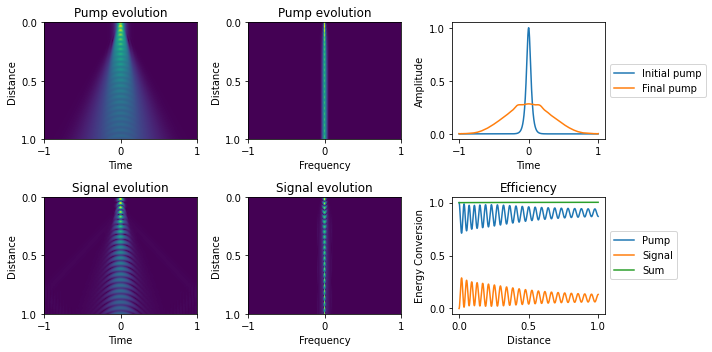

In [20]:
print("Self-defocusing:")
SHG(beta21 = -1, beta22 = -1, dbeta0 = -20,             # dbeta0 is now negative
    length = 6, nlLength1 = 0.1, nlLength2 = 0.1, 
    tMax = 36, tPrecision = 2**11, zPrecision = 100000) # this will take a longer time

#### Self-defocusing solitons

We can also create self-defocusing solitons by balancing the normal dispersion (now `beta21>0`, in contrast to `beta21<0` in anomalous dispersion) and self-defocusing:

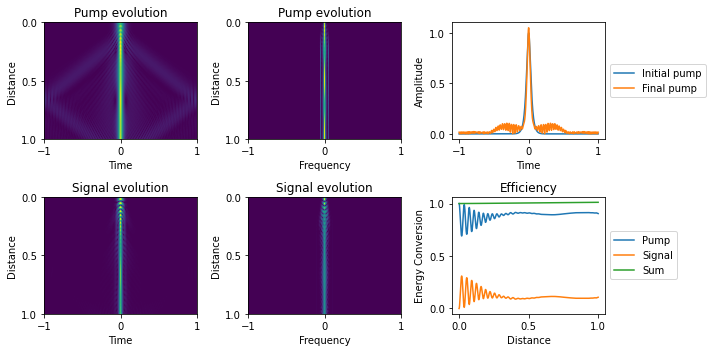

In [19]:
SHG(beta21 = 2.5, beta22 = 0, dbeta0 = -20, 
    length = 6, nlLength1 = 0.1, nlLength2 = 0.1, 
    tMax = 36, tPrecision = 2**11, zPrecision = 100000) # this will take a longer time

### Conclusion & Discussion

We have seen how cascaded $\chi^{(2)}$ nonlinearity can lead to an effective $\chi^{(3)}$ nonlinearity. We can either reproduce interesting phenomena in Kerr nonlinearity, like self-phase modulation or solitons, or observe novel physics unique to cascaded nonlinearity, like self-defocusing and selfdefocusing solitons.

In experiments, another compelling property of cascaded nonlinearity is that it can provide an effective Kerr nonlinearity much larger than that of conventional nonlinear materials. For example, Reference 2 predicts that the cascaded nonlinearity of lithium niobate can be $n_2=4.8 \times$ $10^{-17} \mathrm{~m}^2 / \mathrm{W}$, which is 200 times larger than the nonlinear coefficient of lithium niobate itself, $n_2=2.6 \times 10^{-19} \mathrm{~m}^2 / \mathrm{W}$.

However, there do seem to be some imperfections in our simulation of a soliton, and there is always energy conversion between the pump field and the signal field, which is not desired. Future improvements could be made, for example, by fine-tuning the SHG parameters and optimizing the pulse shape to obtain a cleaner cascaded nonlinearity.


### References

1. Bache, M. (2017). Cascaded nonlinearities for ultrafast nonlinear optical science and applications. DTU - Department of Photonics Engineering.


2. Jankowski, M., Langrock, C., Desiatov, B., Marandi, A., Wang, C., Zhang, M., Phillips, C. R., Lončar, M., & Fejer, M. M. (2020). Ultrabroadband nonlinear optics in nanophotonic periodically poled lithium niobate waveguides. Optica, 7(1), 40.